In [33]:
import h5py
import numpy as np
import os
import glob

List Directories and Get H5 Data File

In [32]:
source_dir = r"/Users/arbailey/natcap/idb/data/source/icesat2/v2/5000000393914"
# datadirs = os.listdir(source_dir)  # relative to source_dir
datadirs = [os.path.join(source_dir, subdir) for 
           subdir in os.listdir(source_dir) if os.path.isdir(os.path.join(source_dir,subdir))] # abs path

In [65]:
os.chdir(datadirs[2])
h5_file = glob.glob('*.h5')[0]


Inspect the H5 Data file

In [66]:
f = h5py.File(h5_file, 'r')  # keep it open

# Inspect base groups quickly
print(f.keys())

KeysView(<HDF5 file "ATL08_20190104045728_01030207_001_01.h5" (mode r)>)


In [67]:
# Inspect the full structure w/metadata
def print_attrs(name, obj):
    print(name)
    for key,val in obj.attrs.items():
        print("    %s: %s" % (key, val))

f.visititems(print_attrs)

orbit_info
    Description: b'Contains orbit information.'
    data_rate: b'Varies. Data are only provided when one of the stored values (besides time) changes.'
orbit_info/crossing_time
    units: b'seconds since 2018-01-01'
    contentType: b'referenceInformation'
    long_name: b'Ascending Node Crossing Time'
    standard_name: b'time'
    description: b'The time, in seconds since the ATLAS SDP GPS Epoch, at which the ascending node crosses the equator. The ATLAS Standard Data Products (SDP) epoch offset is defined within /ancillary_data/atlas_sdp_gps_epoch as the number of GPS seconds between the GPS epoch (1980-01-06T00:00:00.000000Z UTC) and the ATLAS SDP epoch. By adding the offset contained within atlas_sdp_gps_epoch to delta time parameters, the time in gps_seconds relative to the GPS epoch can be computed.'
    source: b'POD/PPD'
    CLASS: b'DIMENSION_SCALE'
    REFERENCE_LIST: [(<HDF5 object reference>, 0) (<HDF5 object reference>, 0)
 (<HDF5 object reference>, 0) (<HDF5 ob

    _FillValue: 127
    units: b'1'
    long_name: b'multiple scattering warning flag'
    description: b'Multiple scattering warning flag has values from 0 to 5. 0=no_scattering, 1=clouds at <1km, 2=clouds at 1-3km, 3=clouds at >3km, 4=blowing snow at <0.5, 5=blowing snow at >=0.5km.'
    source: b'ATL09'
    coordinates: b'delta_time latitude longitude'
    flag_meanings: b'no_scattering clouds_at_<1km, clouds_at_1-3km clouds_at_>3km, blowing_snow_at_<0.5 blowing snow_at_>=0.5km'
    flag_values: [0 1 2 3 4 5]
    DIMENSION_LIST: [array([<HDF5 object reference>], dtype=object)]
gt2r/land_segments/snr
    long_name: b'signal to noise ratio'
    description: b'The signal to noise ratio of geolocated photons as determined by the ratio of the superset of ATL03 signal and DRAGANN found signal photons used for processing the ATL08 segments to the background photons (i.e. noise) within the same ATL08 segments.'
    source: b'ATBD section 2.5.14'
    coordinates: b'delta_time latitude longit

gt1l/land_segments/n_seg_ph
    units: b'1'
    long_name: b'number of photons'
    description: b'Number of photons within each land segment.'
    source: b'Derived'
    coordinates: b'delta_time latitude longitude'
    DIMENSION_LIST: [array([<HDF5 object reference>], dtype=object)]
gt1l/land_segments/terrain_flg
    _FillValue: 2147483647
    units: b'1'
    long_name: b'terrain flag'
    description: b'Terrain flag quality check to indicate a deviation above a threshold from the reference DEM height reported on the product.'
    source: b'Land ATBD section 2.4.8'
    coordinates: b'delta_time latitude longitude'
    flag_meanings: b'below_threshold above_threshold'
    flag_values: [0 1]
    DIMENSION_LIST: [array([<HDF5 object reference>], dtype=object)]
gt1l/land_segments/urban_flag
    _FillValue: 2147483647
    units: b'1'
    long_name: b'segment urban flag'
    description: b'The urban flag indicates that a segment is likely located over an urban area.'
    source: b'Land ATB

    DIMENSION_LIST: [array([<HDF5 object reference>], dtype=object)]
gt2l/land_segments/terrain/h_te_mode
    _FillValue: 3.4028235e+38
    units: b'meters'
    long_name: b'mode of terrain heights'
    description: b'The mode of the photon heights above the WGS84 Ellipsoid, classified as terrain within the segment.'
    source: b'Land ATBD section 4.11'
    coordinates: b'../delta_time ../latitude ../longitude'
    DIMENSION_LIST: [array([<HDF5 object reference>], dtype=object)]
gt2l/land_segments/segment_snowcover
    _FillValue: 127
    units: b'1'
    long_name: b'segment snowcover'
    description: b'Daily snow/ice cover from ATL09 at the 25 Hz rate(275m) indicating likely presence of snow and ice within each segment. 0=ice free water; 1=snow free land;  2=snow; 3=ice.'
    source: b'ATBD section 4.2.16'
    coordinates: b'delta_time latitude longitude'
    flag_meanings: b'ice_free_water snow_free_land snow ice'
    flag_values: [0 1 2 3]
    valid_min: 0
    valid_max: 3
    DIM

    units: b'1'
    contentType: b'referenceInformation'
    long_name: b'sigma atlas topo'
    description: b'Total uncertainty that include sigma_h plus geolocation uncertainty due to local slope (equation 1.3).  The local slope is multiplied by the geolocation uncertainty factor. This will be used to determine the total vertical geolocation error due to ranging and local slope.'
    source: b'Land ATBD section 2.5.12'
    coordinates: b'delta_time latitude longitude'
    DIMENSION_LIST: [array([<HDF5 object reference>], dtype=object)]
gt3r/land_segments/night_flag
    _FillValue: 2147483647
    units: b'1'
    long_name: b'night flag'
    description: b'Flag indicating the data were acquired in night conditions: 0=day, 1=night.  Flag is derived from solar elevation at the geolocated segment.  IF solar elevation is above threshold it is day, if not then it is night.  Threshold is set in atlas_l3a_const_mod.'
    source: b'Land ATBD section 2.4.8'
    coordinates: b'delta_time latitud

    units: b'1'
    long_name: b'dem removal flag'
    description: b'Flag indicating more than dem_removal_percent_limit (default 20.0) removed from land segment due to failing DEM-QA tests'
    source: b'ATBD section 2.4.11'
    coordinates: b'delta_time latitude longitude'
    flag_meanings: b'below_threshold above_threshold'
    flag_values: [0 1]
    DIMENSION_LIST: [array([<HDF5 object reference>], dtype=object)]
gt3r/land_segments/h_dif_ref
    _FillValue: 3.4028235e+38
    units: b'meters'
    long_name: b'h dif from reference'
    description: b'Difference between h_te_median and ref_DEM'
    source: b'Land ATBD section 2.4'
    coordinates: b'delta_time latitude longitude'
    DIMENSION_LIST: [array([<HDF5 object reference>], dtype=object)]


In [68]:
f.close()

Example from https://hdfeos.org/zoo/index_openICESat2_Examples.php

In [69]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

[26.9933    26.992397  26.991493  ...  7.1383924  7.1294317  7.121304 ]
[-78.24439  -78.24449  -78.24459  ... -80.31235  -80.313255 -80.31408 ]
<HDF5 dataset "segment_id": shape (2843,), type "<i4">
[852110 852115 852120 ... 962215 962265 962310]


/Users/arbailey/miniconda3/envs/geoenv/lib/python3.6/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


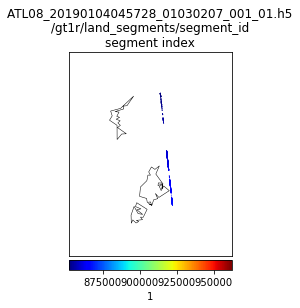

In [70]:
with h5py.File(h5_file, mode='r') as f:

    # Ground Track L1
    latvar = f['/gt1r/land_segments/latitude']
    latitude = latvar[:]
    
    lonvar = f['/gt1r/land_segments/longitude']
    longitude = lonvar[:]
    
    print(latitude)
    print(longitude)
    
    # We'll plot segment id.
    dset_name = '/gt1r/land_segments/segment_id'
    datavar = f[dset_name]
    print(datavar)
    data = datavar[:]
    print(data)
    units = datavar.attrs['units']
    long_name = datavar.attrs['long_name']
    
    # Draw an equidistant cylindrical projection using the low resolution
    # coastline database.
    m = Basemap(projection='cyl', resolution='l',
                llcrnrlat=23, urcrnrlat = 28,
                llcrnrlon= -76, urcrnrlon = -80)
    m.drawcoastlines(linewidth=0.5)
    m.drawparallels(np.arange(-90., 120., 30.))
    m.drawmeridians(np.arange(-180, 180., 45.))
    m.scatter(longitude, latitude, c=data, s=1, cmap=plt.cm.jet,
              edgecolors=None, linewidth=0)
    cb = m.colorbar(location='bottom')
    units = units.decode('ascii', 'replace')        
    cb.set_label(units)
    basename = os.path.basename(h5_file)
    long_name = long_name.decode('ascii', 'replace')        
    plt.title('{0}\n{1}\n{2}'.format(basename, dset_name, long_name))
    
    fig = plt.gcf()   